In [40]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import importlib
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output # Only for iPython

import objective as obj
import helper as help
import parameters as param 
import solver as solve

from model import WormModel
from contraction import ContractionEngine_segmentdriven

importlib.reload(obj)
importlib.reload(help)
importlib.reload(param)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'parameters' from 'c:\\Users\\natha\\Desktop\\UCLA\\_Grad\\2025-2026\\FALL 2025\\MAE 263F\\MAE-263F\\final_report\\parameters.py'>

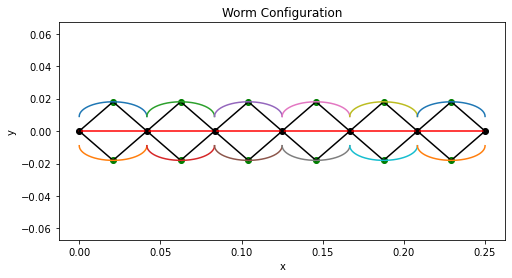

Number of nodes (nv):  19
Number of edges (ne):  30
Number of DOFs (ndof):  38


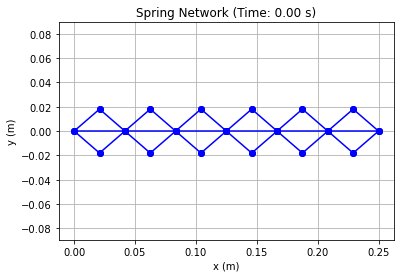

In [41]:
worm = WormModel(param.length, n_segments=param.n)
worm.plot()

print("Number of nodes (nv): ", worm.nv)
print("Number of edges (ne): ", worm.ne)
print("Number of DOFs (ndof): ", worm.ndof)
#print(worm.mMat[0,0], worm.c[0,0])
#print("Initial position vector: ", worm.q0)
#print("Initial velocity vector: ", worm.u0)

def plot(x, index_matrix, t):
    plt.figure()
    plt.title(f"Spring Network (Time: {t:.2f} s)")
    for _, ind in enumerate(index_matrix):
        xi, yi, xj, yj = ind
        plt.plot([xi, xj], [yi, yj], 'bo-')

    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.axis("equal")
    plt.grid(True)
    plt.show()
  
_, _, index_matrix0, _ = worm.get_internal_state()
plot(worm.q0, index_matrix0 , t=0.0)	

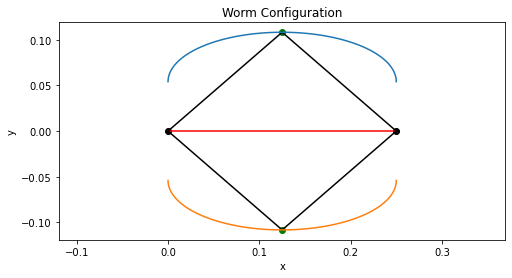

In [42]:
# Example usage
worm1 = WormModel(param.length, n_segments=1)
worm1.plot()


In [ ]:
frames, times = solve.solver(worm1, q_old=worm1.q0, u_old=worm1.u0, dt=param.dt, maxTime=param.totalTime, tol=1e-6, maximum_iter=100)


IndexError: index -2147483648 is out of bounds for axis 0 with size 8